In [8]:
import yfinance as yf
import pandas as pd
import numpy as np
from scipy.stats import t
import seaborn as sns
import matplotlib.pyplot as plt

# Define the list of stock tickers and the time period
tickers = ['AAPL', 'MSFT', 'GOOGL']  # Example tickers
start_date = '2023-01-01'
end_date = '2024-01-01'

# Download historical price data
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

# Calculate daily returns
returns = data.pct_change().dropna()

# Calculate mean vector and covariance matrix
mean_returns = returns.mean()
cov_matrix = returns.cov()




[*********************100%%**********************]  3 of 3 completed


In [9]:
# Define portfolio weights
weights = np.array([0.3, 0.4, 0.3])  # Example weights

# Number of simulations
num_simulations = 10000
num_assets = len(tickers)
num_days = 1  # 1-day VaR

# Simulate random t-distributed returns
simulated_returns = np.zeros((num_simulations, num_assets))

for i in range(num_assets):
    simulated_returns[:, i] = t.rvs(df=3, loc=mean_returns[i], scale=np.sqrt(cov_matrix.iloc[i, i]), size=num_simulations)

# Simulate portfolio returns
portfolio_returns = np.dot(simulated_returns, weights.T)

/var/folders/7j/j1vh6h3s1zx12hh6q5jgd4jc0000gn/T/ipykernel_2268/3630258864.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  simulated_returns[:, i] = t.rvs(df=3, loc=mean_returns[i], scale=np.sqrt(cov_matrix.iloc[i, i]), size=num_simulations)


In [12]:

# Calculate the 5th percentile (VaR at 95% confidence level)
VaR_95 = np.percentile(portfolio_returns, 5)

print(f"Value at Risk (VaR) at 95% confidence level: {VaR_95:.2f}")

ES_95 = portfolio_returns[portfolio_returns <= VaR_95].mean()

print(f"Expected Shortfall (ES) at 95% confidence level: {ES_95:.2f}")

Value at Risk (VaR) at 95% confidence level: -0.02
Expected Shortfall (ES) at 95% confidence level: -0.03


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


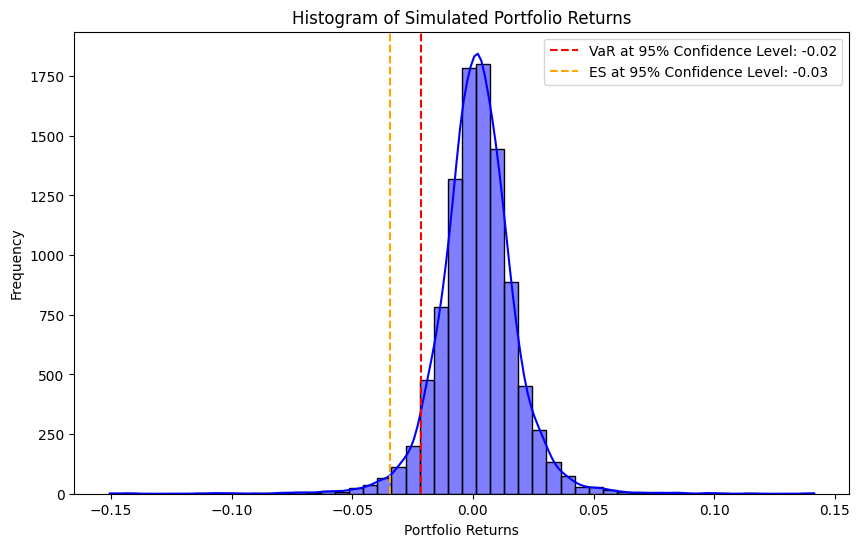

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(portfolio_returns, bins=50, kde=True, color='blue')
plt.axvline(x=VaR_95, color='red', linestyle='--', label=f'VaR at 95% Confidence Level: {VaR_95:.2f}')
plt.axvline(x=ES_95, color='orange', linestyle='--', label=f'ES at 95% Confidence Level: {ES_95:.2f}')
plt.title('Histogram of Simulated Portfolio Returns')
plt.xlabel('Portfolio Returns')
plt.ylabel('Frequency')
plt.legend()
plt.show()